## Background

Here's the setup: we pick $k_\beta$, $\theta_\beta$, $k_\gamma$ and $\theta_\gamma$, with $N$ being the population size. 
We then look at what the induced Gamma ratio on $R_0$ looks like. 

In addition, we create moment-matching log-normal priors on $(\beta, \gamma)$ and look at the induced log-normal on $R_0$.

In [14]:
source("gamma_ratio.R")

In [15]:
## Hyper parameters
k_beta <- 1
theta_beta <- 1
k_gamma <-  2.5
theta_gamma <- 1/10
N <- 1

In [16]:
source("utils.r")

In [17]:
pars.beta <- pars_mm_lognormal(k = k_beta, theta = theta_beta)
pars.gamma <- pars_mm_lognormal(k = k_gamma, theta = theta_gamma)

mu_beta <- pars.beta$mu
sd_beta <- pars.beta$sigma
mu_gamma <- pars.gamma$mu
sd_gamma <- pars.gamma$sigma

mu_r <- log(N) + mu_beta - mu_gamma
sd_r <- sqrt(sd_beta^2 + sd_gamma^2)

## Moments

### Mean and variance of gammas for the rates

First, $\beta$

In [18]:
cat("E[beta]=", k_beta * theta_beta, "\n")
cat("Var(beta)=", k_beta * theta_beta^2)

E[beta]= 1 
Var(beta)= 1

And now $\gamma$

In [19]:
cat("E[gamma]=", k_gamma * theta_gamma, "\n")
cat("Var(gamma)=", k_gamma * theta_gamma^2)

E[gamma]= 1 
Var(gamma)= 1

### Mean and variance of moment-matching log-normals for the rates

In [20]:
cat("E[beta]=", exp(mu_beta + .5 * sd_beta^2), "\n")
cat("Var(beta)=", (exp(sd_beta^2) - 1) * exp(2*mu_beta + sd_beta^2), "\n") 
cat("E[gamma]=", exp(mu_gamma + .5 * sd_gamma^2), "\n")
cat("Var(gamma)=", (exp(sd_gamma^2) - 1) * exp(2*mu_gamma + sd_gamma^2) )

E[beta]= 1 
Var(beta)= 1 
E[gamma]= 1 
Var(gamma)= 1

### Mean and variance of R0 under the Gamma ratio

**NOTICE**: Under the Gamma ratio, $E[R_0]$ does not exist for $k_\gamma > 1$ and $\text{Var}(R_0)$ only exists for $k_\gamma > 2$.

In [21]:
cat("E[R0]=", get_GR_mean(k1 = k_beta, t1 = theta_beta, k2 = k_gamma, t2 = theta_gamma, N = N) , "\n")
cat("Var(R0)=", get_GR_var(k1 = k_beta, t1 = theta_beta, k2 = k_gamma, t2 = theta_gamma, N = N) ) 

E[R0]= Inf 
Var(R0)= -Inf

### Mean and variance of R0 under the log-normal

In [22]:
cat("E[R0]=", exp(mu_r + .5 * sd_r^2) , "\n")
cat("Var(R0)=", (exp(sd_r^2) - 1) * exp(2*mu_r + sd_r^2) ) 

E[R0]= 2 
Var(R0)= 12

## Densities

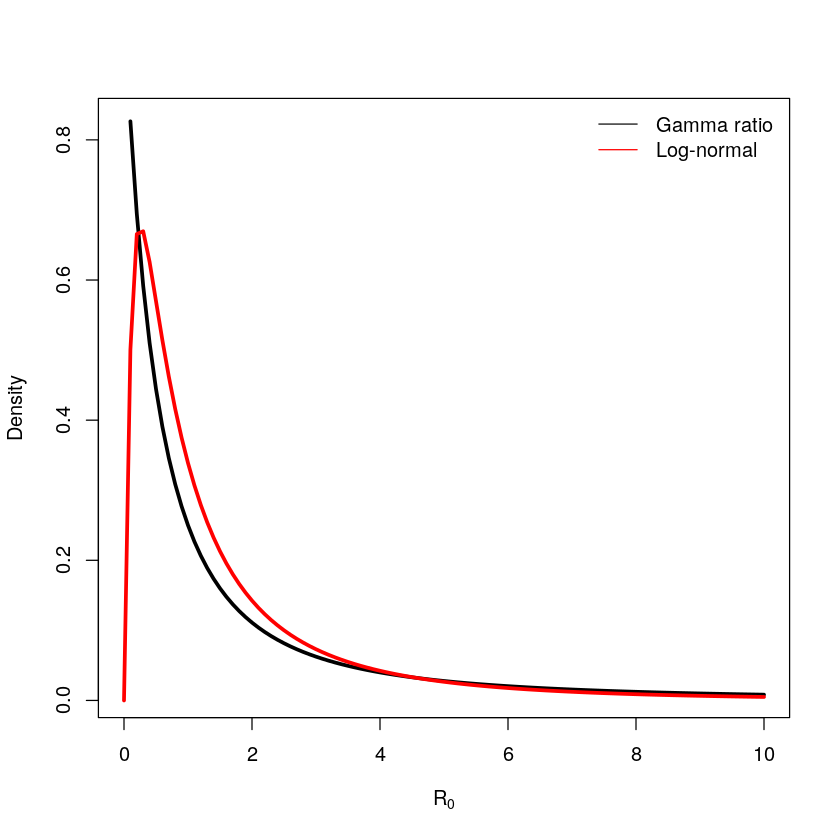

In [23]:
Rmax <- 10
curve(dgamma.ratio(x, k1 = k_beta, t1 = theta_beta, k2 = k_gamma, t2 = theta_gamma, N = N),
      0, Rmax, lwd = 3, ylab = "Density", xlab = expression(R[0]))
curve(dlnorm(x, meanlog = mu_r, sdlog = sd_r), col = 2, lwd = 3, add = TRUE)
legend(x = "topright", legend = c("Gamma ratio", "Log-normal"), col = 1:2, lty = 1, bty = 'n')

## Tail probabilities

In [24]:
pgamma.ratio.exact(q = 5, k1 = k_beta, t1 = theta_beta, k2 = k_gamma, t2 = theta_gamma, N = N)

Warning message in BAS::hypergeometric2F1(k1 + k2, k1, k1 + 1, -t2/(t1 * N) * q):
“integral in 2F1 diverges”

[1] 1

In [25]:
plnorm(q = 5, meanlog = mu_r, sdlog = sd_r)

[1] 0.9141765